## EXAMEN EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### DATASET

In [ ]:
df_forestCovtype = pd.read_csv("covtype.data")

In [ ]:
# Poner el nombre de las columnas en el dataset

titulo_columnas = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
            "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
            "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
            "Horizontal_Distance_To_Fire_Points"]
wilderness_columnas = ["Wilderness_Area_"+str(i) for i in range(1,5)]
soil_columnas = ["Soil_Type_"+str(i) for i in range(1,41)]

titulo_columnas += wilderness_columnas + soil_columnas + ["Cover_Type"]
df_forestCovtype.columns = titulo_columnas

df_forestCovtype

In [ ]:
# Unir las  columnas de wilderness y soil en una sola columna, sumando los valores para ver de cuantos tipos hay

df_forestCovtype["Wilderness_Area"] = df_forestCovtype[wilderness_columnas].max(axis = 1)
df_forestCovtype.drop(wilderness_columnas, axis = 1, inplace = True)

df_forestCovtype["Soil_Type"] = df_forestCovtype[soil_columnas].max(axis = 1)
df_forestCovtype.drop(soil_columnas, axis = 1, inplace = True )

df_forestCovtype = df_forestCovtype.reset_index(drop = True)
df_forestCovtype

In [ ]:
df_forestCovtype.isna().sum()

In [ ]:
df_forestCovtype.info()

In [ ]:
df_forestCovtype.drop(df_forestCovtype.dropna().index)

In [ ]:
df_forestCovtype.describe()

In [ ]:
df_forestCovtype.dtypes

### EJERCICIO 1

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de Selección de variables basada en árbol de decisión mediante las importancias de cada variable (Decision Trees Importances):

- Filtra el tablón para quedarnos solamente con las variables que aglutinan hasta el 95% de la información que se requiere para estimar la variable objetivo.
- random_state=100

In [ ]:
target = "Cover_Type"
features = [x for x in df_forestCovtype.columns if x!= target]
print(target)
print(features)

In [ ]:
df_forestCovtype[target]

In [ ]:
from sklearn.tree import DecisionTreeRegressor

arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state = 100)
arbol_importancia.fit(X = df_forestCovtype[features], y = df_forestCovtype[target]) 

In [ ]:
pred_arbol = arbol_importancia.predict(X = df_forestCovtype[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Mean Absolute Error:', mean_absolute_error(df_forestCovtype[target], pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_forestCovtype[target], pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_forestCovtype[target], pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_forestCovtype[target], pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_forestCovtype[target], pred_arbol))

In [ ]:
arbol_importancia.feature_importances_

In [ ]:
# df con los datos importantes

d_importantes = pd.DataFrame(arbol_importancia.feature_importances_, index = features, columns =["Importancia"])

d_importantes.sort_values(by = d_importantes.columns[0], ascending = False, inplace = True)
d_importantes

In [ ]:
d_importantes["imp_acum"] = d_importantes["Importancia"].cumsum()
d_importantes

In [ ]:
# Variables más importantes
d_importantes.loc[d_importantes["imp_acum"]<=0.95]

In [ ]:
variables = d_importantes.loc[d_importantes["imp_acum"]>0.95].index.to_list()
print(variables)

print("Variables iniciales: ", len(features))
print("Número de variables a elimiar: ",len(variables))




In [ ]:
# filtrar las varibales y quedarnos con las más importantes

df_forestCovtype2 = df_forestCovtype.drop( labels = variables, axis = "columns")
df_forestCovtype2

## EJERCICIO 2

Después de filtrar el dataset vamos a plantear un problema de clasificación para conseguir un clasificador de la cubierta forestal en basea a las variables cartográficas.:

2.1 Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.

2.2 Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de 0 a 1
- Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1

In [ ]:
# IMPORTAR LIBRERÍAS NECESARIAS
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
# 2.1
df_forestCovtype2.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [ ]:
# 2.2
# IMPORTAR LIBRERÍAS NECESARIAS
from sklearn.preprocessing import LabelEncoder

In [ ]:
etiquetado = LabelEncoder()
etiquetado.fit(df_forestCovtype2["Cover_Type"])

In [ ]:
etiquetado.classes_

In [ ]:
df_forestCovtype2["Cover_Type_Num"] = etiquetado.transform(df_forestCovtype2["Cover_Type"])
df_forestCovtype2.groupby(["Cover_Type", "Cover_Type_Num"]).count()

df_forestCovtype3 = df_forestCovtype2.drop("Cover_Type", axis = "columns")

pd.DataFrame(df_forestCovtype3)

## EJERCICIO 3


Después de estandarizar los datos procedemos a crear el primer clasificador:

3.1 Divide el datset en training y en test:

- Guarda el 20% de los datos para testeo.
- random_state=100

3.2 Entrena un modelo de regresión logística:

- Número máximo de iteraciones igual a 1000
- random_state=100

3.3 Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.

- Accuracy
- F1-score (average='weighted')
- Classification report (zero_division=0)
- Confusion matrix

In [ ]:
# 3.1
# IMPORATR LAS LIBRERÍAS NCESARIAS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df_forestCovtype3.drop(columns = ["Cover_Type_Num"])
y = df_forestCovtype3["Cover_Type_Num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
# 3.2
modelo = LogisticRegression(max_iter=1000, random_state=100)
modelo.fit(X_train, y_train)

In [ ]:
# 3.3
# IMPORATR LIBRERAS NECESARIAS
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [ ]:
y_pred = modelo.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
classification = classification_report(y_test, y_pred, zero_division=0)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("F1-score: ", f1)
print("Classification: \n", classification)
print("Confusion matrix: \n", confusion)


### EJERCICIO 4

Ahora probamos la creación de otros modelo basados en árboles de decisión:

4.1 Entrena un modelo tipo Decision Tree Classifire y calcula las métricas correspondientes para analizar su rendimiento en comparación con el modelo anterior:

- random_state=100
- Accuracy
- F1-score (average='weighted')
- Classification report (zero_division=0)

4.2 Saca la curva de complejidad del modelo Decision Tree (Model Complexity Curve) y crea un nuevo clasificador con el valor óptimo de la profundidad del árbol según esta gráfica. Después saca las métricas correspondiente y analiza el rendimiento del modelo en comparación de los anteriores.

- random_state=100
- rango de profundidades: de 2 a 30 inclusive

4.3 Saca la gráfica de el Learning Curve para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.

- random_state=100
- (Sugerencia: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de 1000 muestras para el modelo)

In [ ]:
# 4.1
# IMPORTAR LIBRERIAS
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo_dt = DecisionTreeClassifier(random_state=100)
modelo_dt.fit(X_train, y_train)

y_pred_dt = modelo_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average="weighted")
classification_dt = classification_report(y_test, y_pred_dt, zero_division=0)

print("DECISION TREE CLASIFIER\n-----------------------")
print("Accuracy: ", accuracy_dt)
print("F1-score: ", f1_dt)
print("Classification: \n", classification_dt)

In [ ]:
# 4.2

profundidad = range(2, 31)
train_scores = []
test_scores = []

for depth in profundidad:
    modelo = DecisionTreeClassifier(max_depth=profundidad, random_state=100)
    modelo.fit(X_train, y_train)

    train_score = modelo.score(X_train, y_train)
    test_score = modelo.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

    plt.figure(figsize=(10,6))
    plt.plot(profundidad, train_scores, label = "Train Score")
    plt.plot(profundidad, test_scores, label = "Test Score")
    plt.xlabel("Profundidad")
    plt.ylabel("accuracy")
    plt.title("Curva de complejidad del modelo Decission Tree")
    plt.legend()
    plt.show()

    profundidad_optima = profundidad[np.argmax(test_scores)]
    print("La profundidad óptima es: ", profundidad_optima)

    modelo_optima = DecisionTreeClassifier(max_depth=profundidad_optima, random_state=100)
    modelo_optima.fit(X_train, y_train)

    y_pred_optima = modelo_optima.predict(X_test)
    accuracy_optima = accuracy_score(y_test, y_pred_optima)
    f1_optima = f1_score(y_test, y_pred_optima, average="weighted")
    classification_optima = classification_report(y_test, y_pred_optima, zero_divisions=0)

    print("Decision Tree Classifier con profundidad óptima\n-----------------------------------------------")
    print("Accuracy: ", accuracy_optima)
    print("F1-score: ", f1_optima)
    print("Classification report: \n", classification_optima)


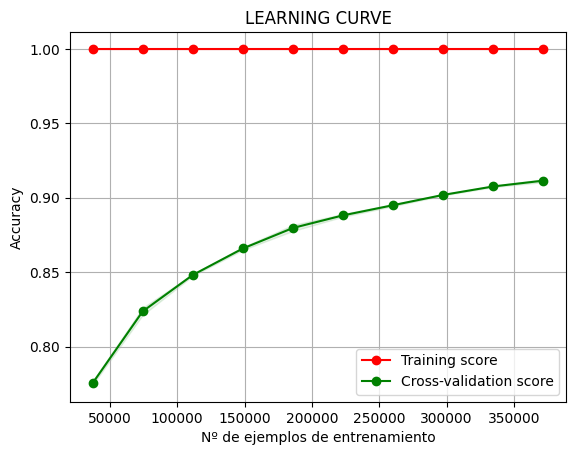

In [118]:
# 4.3
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator,title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Nº de ejemplos de entrenamiento")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes,return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    fit_times_mean = np.mean(fit_times,axis=1)
    fit_times_std = np.std(fit_times,axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color = "red")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color ="green")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "red", label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "green", label = "Cross-validation score")
    plt.legend(loc="best")

    return plt

cv = 5
n_jobs = -1

modelo_dt = DecisionTreeClassifier(random_state=100)
modelo_dt.fit(X_train, y_train)

title = "LEARNING CURVE"
plot_learning_curve(modelo_dt, title, X_train, y_train, cv=cv, n_jobs=n_jobs)
plt.show()
